<a href="https://colab.research.google.com/github/sm-lee-1/Caba_nlp/blob/main/DL21_classifying_newswires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 로이터 데이터셋

1986년에 로이터에서 공개한 짧은 뉴스 기사와 토픽의 집합인 로이터 데이터셋을 사용하겠습니다. 이 데이터셋은 텍스트 분류를 위해 널리 사용되는 간단한 데이터셋입니다. 46개의 토픽이 있으며 어떤 토픽은 다른 것에 비해 데이터가 많습니다. 각 토픽은 훈련 세트에 최소한 10개의 샘플을 가지고 있습니다.

In [1]:
from keras.datasets import reuters
(train_data,train_labels),(test_data,test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [ ]:
len(train_data)

8982

In [ ]:
len(test_data)

2246

In [ ]:
train_data[:5]

array([list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
       list([1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]),
       list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110,

In [ ]:
train_labels[:5]

array([3, 4, 3, 4, 4])

In [2]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i,sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)    

In [ ]:
x_train.shape

(8982, 10000)

In [ ]:
x_train[:5]

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [3]:
# 레이블의 원-핫 인코딩은 닫 레이블의 인덱스 자리는 1이고 나머지는 모두 0인 벡터
# 사용자 함수
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i,label] = 1.
  return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)    

In [4]:
# 내장 함수
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [5]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [6]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [7]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [8]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 4s 41ms/step - loss: 3.1610 - accuracy: 0.3910 - val_loss: 1.7469 - val_accuracy: 0.6440
Epoch 2/20
16/16 [==============================] - 0s 15ms/step - loss: 1.5229 - accuracy: 0.6950 - val_loss: 1.2928 - val_accuracy: 0.7220
Epoch 3/20
16/16 [==============================] - 0s 15ms/step - loss: 1.1069 - accuracy: 0.7681 - val_loss: 1.1302 - val_accuracy: 0.7530
Epoch 4/20
16/16 [==============================] - 0s 15ms/step - loss: 0.8523 - accuracy: 0.8156 - val_loss: 1.0325 - val_accuracy: 0.7770
Epoch 5/20
16/16 [==============================] - 0s 14ms/step - loss: 0.6845 - accuracy: 0.8531 - val_loss: 0.9812 - val_accuracy: 0.7980
Epoch 6/20
16/16 [==============================] - 0s 15ms/step - loss: 0.5361 - accuracy: 0.8908 - val_loss: 0.9483 - val_accuracy: 0.8020
Epoch 7/20
16/16 [==============================] - 0s 15ms/step - loss: 0.4175 - accuracy: 0.9125 - val_loss: 0.9214 - val_accuracy: 0.8030
Epoch 8/20
16

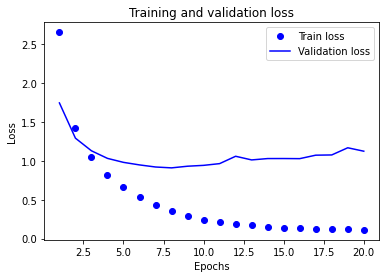

In [10]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Train loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

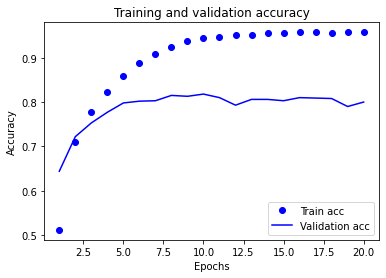

In [12]:
plt.clf()
history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Train acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:
from keras import models 
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [14]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [16]:
model.fit(partial_x_train,
          partial_y_train, 
          epochs=9, 
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 23ms/step - loss: 3.0408 - accuracy: 0.4339 - val_loss: 1.7348 - val_accuracy: 0.6350
Epoch 2/9
16/16 [==============================] - 0s 15ms/step - loss: 1.5195 - accuracy: 0.6860 - val_loss: 1.3187 - val_accuracy: 0.7210
Epoch 3/9
16/16 [==============================] - 0s 15ms/step - loss: 1.1047 - accuracy: 0.7623 - val_loss: 1.1159 - val_accuracy: 0.7540
Epoch 4/9
16/16 [==============================] - 0s 15ms/step - loss: 0.8302 - accuracy: 0.8235 - val_loss: 1.0081 - val_accuracy: 0.7910
Epoch 5/9
16/16 [==============================] - 0s 15ms/step - loss: 0.6664 - accuracy: 0.8617 - val_loss: 0.9505 - val_accuracy: 0.8020
Epoch 6/9
16/16 [==============================] - 0s 15ms/step - loss: 0.5333 - accuracy: 0.8910 - val_loss: 0.9178 - val_accuracy: 0.8000
Epoch 7/9
16/16 [==============================] - 0s 15ms/step - loss: 0.4306 - accuracy: 0.9097 - val_loss: 0.8818 - val_accuracy: 0.8170
Epoch 8/9
16/16 [===

In [17]:
results

[0.9859542846679688, 0.7880676984786987]

In [18]:
predictions = model.predict(x_test)
predictions

array([[9.48141496e-06, 1.15369883e-04, 1.22628597e-04, ...,
        1.26778577e-05, 8.89959392e-06, 1.32177001e-06],
       [3.07736825e-03, 2.44383141e-01, 4.26744111e-02, ...,
        1.21854364e-05, 7.36219079e-07, 1.56861308e-04],
       [1.12324646e-02, 8.49467874e-01, 6.29978115e-03, ...,
        5.02267867e-05, 1.36250574e-05, 2.60621222e-04],
       ...,
       [1.91366689e-05, 8.28601187e-05, 5.38717977e-05, ...,
        2.71256413e-05, 6.81332604e-05, 5.48897833e-06],
       [2.96665356e-03, 1.01018816e-01, 9.14403051e-03, ...,
        1.43600162e-03, 6.65596453e-04, 1.99356131e-04],
       [5.22675284e-04, 5.68184733e-01, 3.79607780e-03, ...,
        7.76896341e-05, 2.54971364e-05, 1.31106077e-04]], dtype=float32)

In [19]:
np.sum(predictions[0])

0.99999994

In [20]:
np.argmax(predictions[0])

3

In [29]:
# 은닉층을 4로 수정

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 7ms/step - loss: 3.3156 - accuracy: 0.0645 - val_loss: 2.3446 - val_accuracy: 0.5090
Epoch 2/20
63/63 [==============================] - 0s 5ms/step - loss: 2.0312 - accuracy: 0.5606 - val_loss: 1.5978 - val_accuracy: 0.5970
Epoch 3/20
63/63 [==============================] - 0s 5ms/step - loss: 1.4754 - accuracy: 0.6163 - val_loss: 1.5019 - val_accuracy: 0.6260
Epoch 4/20
63/63 [==============================] - 0s 5ms/step - loss: 1.2990 - accuracy: 0.6727 - val_loss: 1.4465 - val_accuracy: 0.6410
Epoch 5/20
63/63 [==============================] - 0s 5ms/step - loss: 1.2055 - accuracy: 0.6840 - val_loss: 1.3664 - val_accuracy: 0.6720
Epoch 6/20
63/63 [==============================] - 0s 5ms/step - loss: 1.0691 - accuracy: 0.7244 - val_loss: 1.3257 - val_accuracy: 0.6920
Epoch 7/20
63/63 [==============================] - 0s 5ms/step - loss: 0.9603 - accuracy: 0.7556 - val_loss: 1.3411 - val_accuracy: 0.6780
Epoch 8/20
63/63 [==